# Import

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
def imread(filename, flags=cv2.IMREAD_COLOR, dtype=np.uint8):
    try:
        n = np.fromfile(filename, dtype)
        img = cv2.imdecode(n, flags)
        return img
    except Exception as e:
        print(e)
        return None

# ONNX 모델 형태 Export

In [4]:
from ultralytics import YOLO
model = YOLO("C:/Users/USER/runs/detect/train41/weights/best.pt")
model.export(format="onnx", imgsz=[640,640])

Ultralytics YOLOv8.0.203  Python-3.9.16 torch-1.12.1 CPU (13th Gen Intel Core(TM) i9-13900K)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from 'C:\Users\USER\runs\detect\train41\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (49.6 MB)

ONNX: starting export with onnx 1.15.0 opset 10...
ONNX: export success  2.1s, saved as 'C:\Users\USER\runs\detect\train41\weights\best.onnx' (98.8 MB)

Export complete (4.1s)
Results saved to C:\Users\USER\runs\detect\train41\weights
Predict:         yolo predict task=detect model=C:\Users\USER\runs\detect\train41\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=C:\Users\USER\runs\detect\train41\weights\best.onnx imgsz=640 data=C:\Users\USER\Desktop\\  6\ \code\image code\data.yaml  
Visualize:       https://netron.app


'C:\\Users\\USER\\runs\\detect\\train41\\weights\\best.onnx'

# 이미지, 모델 불러오기 및 테스트 진행하기

In [3]:
model = YOLO("C:/Users/USER/runs/detect/train41/weights/best.onnx")
path = os.getcwd()
img = imread(os.path.join(os.path.join(os.path.join(path,"img_data")"All_img"),"00001.jpg")
results = model(img)

Loading C:\Users\USER\runs\detect\train41\weights\best.onnx for ONNX Runtime inference...

0: 640x640 1 Top, 1 Outer, 1 Pants, 94.5ms
Speed: 3.0ms preprocess, 94.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


tensor([2., 0., 1.])


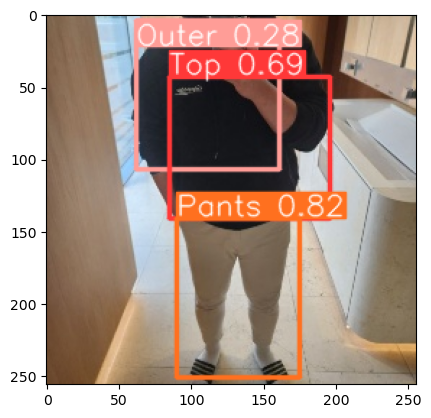

In [5]:
for result in results:
    print(result.boxes.cls)
    plots = result.plot()
    fix_img = cv2.cvtColor(plots, cv2.COLOR_BGR2RGB)
    plt.imshow(fix_img)
    plt.show()        